In [318]:
import pandas as pd
import numpy as np
from address_by_postcode import get_coordinates_by_postcode
import datetime
from prophet import Prophet
from copy import deepcopy

In [2]:
full_hourly = pd.read_csv('full_hourly.csv')

/Users/olgas/study/solar-forecast/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
hourly_224 = full_hourly[full_hourly['Customer'] == 224]
hourly_224 = hourly_224[hourly_224['Consumption Category'] == 'GG']

In [45]:
hourly_224.head()

,Unnamed: 0,Production,time,datetime,date,Customer,Generator Capacity,Postcode,Consumption Category,datetime_f
9618528,0:30,0.0,0:30,1-Jul-10 0:30,1-Jul-10,224,1.02,2261,GG,2010-07-01 00:30:00
9618529,1:00,0.0,1:00,1-Jul-10 1:00,1-Jul-10,224,1.02,2261,GG,2010-07-01 01:00:00
9618530,1:30,0.0,1:30,1-Jul-10 1:30,1-Jul-10,224,1.02,2261,GG,2010-07-01 01:30:00
9618531,2:00,0.0,2:00,1-Jul-10 2:00,1-Jul-10,224,1.02,2261,GG,2010-07-01 02:00:00
9618532,2:30,0.0,2:30,1-Jul-10 2:30,1-Jul-10,224,1.02,2261,GG,2010-07-01 02:30:00


In [46]:
hourly_224['datetime_f1'] = pd.to_datetime(hourly_224['datetime'], format='%d-%b-%y %H:%M', errors='coerce')
hourly_224['datetime_f2'] = pd.to_datetime(hourly_224['datetime'], format='%d/%b/%y %H:%M', errors='coerce')
hourly_224['datetime_f3'] = pd.to_datetime(hourly_224['datetime'], format='%d/%m/%Y %H:%M', errors='coerce')

In [47]:
hourly_224['Timestamp'] = np.where(hourly_224['datetime_f1'].isna(), hourly_224['datetime_f2'], hourly_224['datetime_f'])

In [48]:
hourly_224['Timestamp'] = np.where(hourly_224['datetime_f1'].isna(), hourly_224['datetime_f2'], hourly_224['datetime_f1'])
hourly_224['Timestamp'] = np.where(hourly_224['Timestamp'].isna(), hourly_224['datetime_f3'], hourly_224['Timestamp'])
hourly_224['datetime_f'] = hourly_224['Timestamp']

In [49]:
hourly_224 = hourly_224[['Production', 'time', 'datetime_f', 'Postcode']]
hourly_224 = hourly_224.reset_index().set_index('datetime_f')

In [50]:
sampled_production = hourly_224['Production'].resample("D").sum()

In [51]:

hourly_224['date'] = hourly_224.index.date

In [52]:
day_sum_prod = hourly_224['Production'].resample("D").sum()

In [53]:
day_sum_prod = pd.DataFrame(day_sum_prod)
day_sum_prod.head()

,Production
datetime_f,
2010-07-01,0.0
2010-07-02,0.0
2010-07-03,0.0
2010-07-04,0.0
2010-07-05,0.0


In [54]:
day_sum_prod['date'] = pd.to_datetime(day_sum_prod.index.date)

In [55]:
day_sum_prod.head()

,Production,date
datetime_f,,
2010-07-01,0.0,2010-07-01
2010-07-02,0.0,2010-07-02
2010-07-03,0.0,2010-07-03
2010-07-04,0.0,2010-07-04
2010-07-05,0.0,2010-07-05


In [56]:
hourly_224['date']  = pd.to_datetime(hourly_224['date'])

In [57]:
hourly_224 = hourly_224.merge(day_sum_prod, how='left', on='date')

In [37]:
hourly_224 = hourly_224.drop(['index'], axis=1)

In [59]:
hourly_224.head()

,index,Production_x,time,Postcode,date,Production_y
0,9618528,0.0,0:30,2261,2010-07-01,0.0
1,9618529,0.0,1:00,2261,2010-07-01,0.0
2,9618530,0.0,1:30,2261,2010-07-01,0.0
3,9618531,0.0,2:00,2261,2010-07-01,0.0
4,9618532,0.0,2:30,2261,2010-07-01,0.0


In [60]:
hourly_224['part'] = hourly_224['Production_x'] /  hourly_224['Production_y']

In [63]:
hourly_224.fillna(0)

,index,Production_x,time,Postcode,date,Production_y,part
0,9618528,0.0,0:30,2261,2010-07-01,0.000,0.0
1,9618529,0.0,1:00,2261,2010-07-01,0.000,0.0
2,9618530,0.0,1:30,2261,2010-07-01,0.000,0.0
3,9618531,0.0,2:00,2261,2010-07-01,0.000,0.0
4,9618532,0.0,2:30,2261,2010-07-01,0.000,0.0
...,...,...,...,...,...,...,...
52603,35535211,0.0,22:00,2261,2013-06-30,1.258,0.0
52604,35535212,0.0,22:30,2261,2013-06-30,1.258,0.0
52605,35535213,0.0,23:00,2261,2013-06-30,1.258,0.0
52606,35535214,0.0,23:30,2261,2013-06-30,1.258,0.0


In [ ]:
hourly_224_cut  = hourly_224_cut.merge(weather, how='left', on='date')

In [65]:
year = '2010'
initial_df = pd.read_csv(f'data/2010.csv', header=0)
initial_df['day'] = initial_df[year]
initial_df.drop([year], inplace=True, axis=1)
s = pd.DataFrame(initial_df.set_index(['day']).unstack(['day']))
df = pd.DataFrame(s.to_records(), index=s.index).reset_index(drop=True)[['level_0', 'day', '0']].reset_index(drop=True)
df['date'] = df['day'].astype(str) + "-" + df['level_0'] + f'-{year}'
df = df[['0', 'date']].dropna()
df['date'] = pd.to_datetime(df['date'])
    # return df
df.head()
weather_2010_df = df

In [67]:
year = '2011'
initial_df = pd.read_csv(f'data/2011.csv', header=0)
initial_df['day'] = initial_df[year]
initial_df.drop([year], inplace=True, axis=1)
s = pd.DataFrame(initial_df.set_index(['day']).unstack(['day']))
df = pd.DataFrame(s.to_records(), index=s.index).reset_index(drop=True)[['level_0', 'day', '0']].reset_index(drop=True)
df['date'] = df['day'].astype(str) + "-" + df['level_0'] + f'-{year}'
df = df[['0', 'date']].dropna()
df['date'] = pd.to_datetime(df['date'])
    # return df
df.head()
weather_2011_df = df

In [68]:
year = '2012'
initial_df = pd.read_csv(f'data/2012.csv', header=0)
initial_df['day'] = initial_df[year]
initial_df.drop([year], inplace=True, axis=1)
s = pd.DataFrame(initial_df.set_index(['day']).unstack(['day']))
df = pd.DataFrame(s.to_records(), index=s.index).reset_index(drop=True)[['level_0', 'day', '0']].reset_index(drop=True)
df['date'] = df['day'].astype(str) + "-" + df['level_0'] + f'-{year}'
df = df[['0', 'date']].dropna()
df['date'] = pd.to_datetime(df['date'])
    # return df
df.head()
weather_2012_df = df

In [69]:
year = '2013'
initial_df = pd.read_csv(f'data/2013.csv', header=0)
initial_df['day'] = initial_df[year]
initial_df.drop([year], inplace=True, axis=1)
s = pd.DataFrame(initial_df.set_index(['day']).unstack(['day']))
df = pd.DataFrame(s.to_records(), index=s.index).reset_index(drop=True)[['level_0', 'day', '0']].reset_index(drop=True)
df['date'] = df['day'].astype(str) + "-" + df['level_0'] + f'-{year}'
df = df[['0', 'date']].dropna()
df['date'] = pd.to_datetime(df['date'])
    # return df
df.head()
weather_2013_df = df

In [70]:
weather = pd.concat([weather_2010_df, weather_2011_df, weather_2012_df, weather_2013_df])

In [71]:
hourly_224  = hourly_224.merge(weather, how='left', on='date')

In [72]:
hourly_224.head()

,index,Production_x,time,Postcode,date,Production_y,part,0
0,9618528,0.0,0:30,2261,2010-07-01,0.0,NaN,0.0
1,9618529,0.0,1:00,2261,2010-07-01,0.0,NaN,0.0
2,9618530,0.0,1:30,2261,2010-07-01,0.0,NaN,0.0
3,9618531,0.0,2:00,2261,2010-07-01,0.0,NaN,0.0
4,9618532,0.0,2:30,2261,2010-07-01,0.0,NaN,0.0


In [75]:
import pgeocode
nomi = pgeocode.Nominatim('au')

    
def get_longitude_postcode(postcode):
    return nomi.query_postal_code(postcode).longitude


def get_latitude_postcode(postcode):
    return nomi.query_postal_code(postcode).latitude

In [76]:
hourly_224['latitude'] = hourly_224.apply(lambda x: get_latitude_postcode(x['Postcode']), axis=1)
hourly_224['longitude'] = hourly_224.apply(lambda x: get_longitude_postcode(x['Postcode']), axis=1)

In [77]:
hourly_224['day'] = hourly_224['date'].map(lambda x: x.day)
hourly_224['month'] = hourly_224['date'].map(lambda x: x.month)
hourly_224['year'] = hourly_224['date'].map(lambda x: x.year)

In [78]:
hourly_224.head()

,index,Production_x,time,Postcode,date,Production_y,part,0,latitude,longitude,day,month,year
0,9618528,0.0,0:30,2261,2010-07-01,0.0,NaN,0.0,-33.3685,151.47274,1,7,2010
1,9618529,0.0,1:00,2261,2010-07-01,0.0,NaN,0.0,-33.3685,151.47274,1,7,2010
2,9618530,0.0,1:30,2261,2010-07-01,0.0,NaN,0.0,-33.3685,151.47274,1,7,2010
3,9618531,0.0,2:00,2261,2010-07-01,0.0,NaN,0.0,-33.3685,151.47274,1,7,2010
4,9618532,0.0,2:30,2261,2010-07-01,0.0,NaN,0.0,-33.3685,151.47274,1,7,2010


In [87]:
from astral import LocationInfo
from astral.sun import sun

def get_sunset_time(lat, long, day, month, year):
    location = LocationInfo(latitude=lat,longitude=long)
    s = sun(location.observer, date=datetime.date(year, month, day))
    return s['sunset']

def get_sunrise_time(lat, long, day, month, year):
    location = LocationInfo(latitude=lat,longitude=long)
    s = sun(location.observer, date=datetime.date(year, month, day))
    return s['sunrise']

In [88]:
hourly_224['sunset'] = hourly_224.apply(lambda x: get_sunset_time(x['latitude'], x['longitude'], x['day'], x['month'], x['year']), axis=1)
hourly_224['sunrise'] = hourly_224.apply(lambda x: get_sunrise_time(x['latitude'], x['longitude'], x['day'], x['month'], x['year']), axis=1)

In [92]:
hourly_224['time_f'] = pd.to_datetime(hourly_224['time']).dt.time

In [93]:
hourly_224['in_daylight'] = (hourly_224['time_f'] > hourly_224['sunset'].dt.time) & (hourly_224['time_f'] < hourly_224['sunrise'].dt.time)

In [94]:
hourly_224['ds'] = pd.to_datetime(hourly_224['date'].astype(str)+" " + hourly_224['time_f'].astype(str), format='%Y-%m-%d %H:%M:%S')


In [97]:
hourly_224 = hourly_224.drop(['part','index'],  axis=1)

In [100]:
hourly_224_ds = hourly_224.reset_index(drop=True).set_index(['ds'])

In [101]:
prod_x = hourly_224_ds['Production_x']

In [176]:
X = hourly_224_ds.drop(['Production_x', 'Production_y'], axis=1)
y = hourly_224_ds['Production_x'] /hourly_224_ds['Production_y']

In [177]:
X['hour'] = X['time_f'].map(lambda x: x.hour)
X['minute'] = X['time_f'].map(lambda x: x.minute)


In [178]:
X['sunset_hour'] = X['sunset'].map(lambda x: x.hour)
X['sunset_minute'] = X['sunset'].map(lambda x: x.minute)
X['sunrise_hour'] = X['sunrise'].map(lambda x: x.hour)
X['sunrise_minute'] = X['sunrise'].map(lambda x: x.minute)

In [179]:
X.head()

,time,Postcode,date,0,latitude,longitude,day,month,year,sunset,sunrise,time_f,in_daylight,hour,minute,sunset_hour,sunset_minute,sunrise_hour,sunrise_minute
ds,,,,,,,,,,,,,,,,,,,
2010-07-01 00:30:00,0:30,2261,2010-07-01,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,00:30:00,False,0,30,6,56,20,58
2010-07-01 01:00:00,1:00,2261,2010-07-01,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,01:00:00,False,1,0,6,56,20,58
2010-07-01 01:30:00,1:30,2261,2010-07-01,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,01:30:00,False,1,30,6,56,20,58
2010-07-01 02:00:00,2:00,2261,2010-07-01,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,02:00:00,False,2,0,6,56,20,58
2010-07-01 02:30:00,2:30,2261,2010-07-01,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,02:30:00,False,2,30,6,56,20,58


In [180]:
X_cut= X.drop(['time', 'date', 'time_f', 'sunset', 'sunrise'], axis=1)

<AxesSubplot:xlabel='ds'>

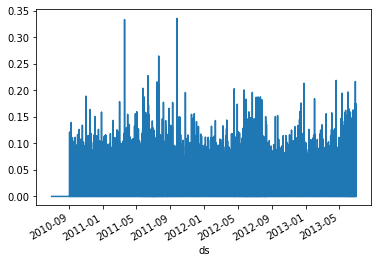

In [235]:
y.plot()

In [263]:
hourly_224_ds[(hourly_224_ds['in_daylight'] == False) & (hourly_224_ds['Production_x'] != 0)]


,Production_x,time,Postcode,date,Production_y,0,latitude,longitude,day,month,year,sunset,sunrise,time_f,in_daylight
ds,,,,,,,,,,,,,,,
2010-09-05 07:00:00,0.006,7:00,2261,2010-09-05,4.515,0.0,-33.3685,151.47274,5,9,2010,2010-09-05 07:38:40.278653+00:00,2010-09-04 20:07:46.098498+00:00,07:00:00,False
2010-09-05 07:30:00,0.019,7:30,2261,2010-09-05,4.515,0.0,-33.3685,151.47274,5,9,2010,2010-09-05 07:38:40.278653+00:00,2010-09-04 20:07:46.098498+00:00,07:30:00,False
2010-09-06 07:00:00,0.006,7:00,2261,2010-09-06,3.859,0.0,-33.3685,151.47274,6,9,2010,2010-09-06 07:39:19.670344+00:00,2010-09-05 20:06:26.822991+00:00,07:00:00,False
2010-09-06 07:30:00,0.013,7:30,2261,2010-09-06,3.859,0.0,-33.3685,151.47274,6,9,2010,2010-09-06 07:39:19.670344+00:00,2010-09-05 20:06:26.822991+00:00,07:30:00,False
2010-09-07 07:00:00,0.006,7:00,2261,2010-09-07,4.046,0.0,-33.3685,151.47274,7,9,2010,2010-09-07 07:39:59.040373+00:00,2010-09-06 20:05:07.135044+00:00,07:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-12 04:00:00,0.006,4:00,2261,2013-06-12,0.370,0.0,-33.3685,151.47274,12,6,2013,2013-06-12 06:52:46.270240+00:00,2013-06-11 20:54:58.767242+00:00,04:00:00,False
2013-06-17 03:30:00,0.006,3:30,2261,2013-06-17,1.534,0.0,-33.3685,151.47274,17,6,2013,2013-06-17 06:53:07.447610+00:00,2013-06-16 20:56:47.322766+00:00,03:30:00,False
2013-06-20 21:00:00,0.006,21:00,2261,2013-06-20,1.111,1.0,-33.3685,151.47274,20,6,2013,2013-06-20 06:53:36.904130+00:00,2013-06-19 20:57:37.667389+00:00,21:00:00,False


In [230]:
X_train = X_cut[X_cut.index <= '2013-01-01']
X_test = X_cut[X_cut.index > '2013-01-01']

In [231]:
y = y.fillna(0)

In [232]:
y_train = y[y.index <= '2013-01-01']
y_test = y[y.index > '2013-01-01']

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [234]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
wape = np.sum(np.abs((y_pred - y_test.reset_index(drop=True))) / np.sum(y_test.reset_index(drop=True))) * 100
wape

30.779596719513314

In [189]:
for i, n in zip(rf.feature_importances_, X_train.columns):
    if i > 0.01:
        print(i, n)

0.038365691521314985 0
0.03550730963835739 day
0.05725451557712586 month
0.039723538601675025 year
0.3773638458034847 in_daylight
0.3401478495810451 hour
0.015576808488038836 minute
0.029517769337825447 sunset_hour
0.028200208356892506 sunset_minute
0.034617810125373065 sunrise_minute


In [129]:
full_daily = pd.read_csv('full_daily3.csv',  header=2)
full_daily.head()

,datetime_f,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,2010-07-01,2008,116,0.164375
1,2010-07-02,2008,116,0.038833
2,2010-07-03,2008,116,0.164667
3,2010-07-04,2008,116,0.156146
4,2010-07-05,2008,116,0.033250


In [130]:
full_daily['Customer'] = full_daily['Unnamed: 2']
full_daily['Postcode'] = full_daily['Unnamed: 1']
full_daily['y'] = full_daily['Unnamed: 3']
full_daily['ds'] = full_daily['datetime_f']

In [275]:
full_daily_customer = full_daily[['ds', 'y', 'Customer']]
daily_224 = full_daily_customer[full_daily_customer['Customer'] == 224]

In [276]:
daily_224.head()

,ds,y,Customer
220215,2010-07-01,0.0,224
220216,2010-07-02,0.0,224
220217,2010-07-03,0.0,224
220218,2010-07-04,0.0,224
220219,2010-07-05,0.0,224


In [277]:
daily_224['date'] = daily_224['ds']

/var/folders/mg/767ccrw57tq3dwbcv7v2hvrc0000gn/T/ipykernel_75932/1215668581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_224['date'] = daily_224['ds']


In [278]:
daily_224['date'] = pd.to_datetime(daily_224['date'])

/var/folders/mg/767ccrw57tq3dwbcv7v2hvrc0000gn/T/ipykernel_75932/2024472386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_224['date'] = pd.to_datetime(daily_224['date'])


In [279]:
daily_224 = daily_224.merge(weather, how='left', on='date')

In [142]:
daily_224['rain'] = daily_224['0']

In [146]:
temp_2010 = pd.read_csv("data/Temp_max_2010_Data.csv")[['Maximum temperature (Degree C)', 'Year', 'Month', 'Day']]

temp_2010['temp'] = temp_2010["Maximum temperature (Degree C)"]
temp_2010 = temp_2010.drop("Maximum temperature (Degree C)", axis=1)
temp_2010['ds'] = pd.to_datetime(temp_2010['Year'].astype(str) + "-" +  temp_2010['Month'].astype(str) + "-" + temp_2010['Day'].astype(str))
temp_2010['temp'].fillna(method='ffill', inplace=True)

In [147]:
temp_2011 = pd.read_csv("data/Temp_max_2011_Data.csv")[['Maximum temperature (Degree C)', 'Year', 'Month', 'Day']]

temp_2011['temp'] = temp_2011["Maximum temperature (Degree C)"]
temp_2011 = temp_2011.drop("Maximum temperature (Degree C)", axis=1)
temp_2011['ds'] = pd.to_datetime(temp_2011['Year'].astype(str) + "-" +  temp_2011['Month'].astype(str) + "-" + temp_2011['Day'].astype(str))
temp_2011['temp'].fillna(method='ffill', inplace=True)

In [148]:
temp_2012 = pd.read_csv("data/Temp_max_2012_Data.csv")[['Maximum temperature (Degree C)', 'Year', 'Month', 'Day']]

temp_2012['temp'] = temp_2012["Maximum temperature (Degree C)"]
temp_2012 = temp_2012.drop("Maximum temperature (Degree C)", axis=1)
temp_2012['ds'] = pd.to_datetime(temp_2012['Year'].astype(str) + "-" +  temp_2012['Month'].astype(str) + "-" + temp_2012['Day'].astype(str))
temp_2012['temp'].fillna(method='ffill', inplace=True)

In [149]:
temp_2013 = pd.read_csv("data/Temp_max_2013_Data.csv")[['Maximum temperature (Degree C)', 'Year', 'Month', 'Day']]

temp_2013['temp'] = temp_2013["Maximum temperature (Degree C)"]
temp_2013 = temp_2013.drop("Maximum temperature (Degree C)", axis=1)
temp_2013['ds'] = pd.to_datetime(temp_2013['Year'].astype(str) + "-" +  temp_2013['Month'].astype(str) + "-" + temp_2013['Day'].astype(str))
temp_2013['temp'].fillna(method='ffill', inplace=True)

In [150]:
max_temp_df = pd.concat([temp_2010, temp_2011, temp_2012, temp_2013])
max_temp_df['ds'] = max_temp_df['ds'].astype(str)

In [157]:
daily_224_temp = daily_224.merge(max_temp_df[['ds', 'temp']], how='left', on='ds')
daily_224_temp.head()

,ds,y,Customer,date,0,rain,temp
0,2010-07-01,0.0,224,2010-07-01,0.0,0.0,16.1
1,2010-07-02,0.0,224,2010-07-02,0.0,0.0,13.2
2,2010-07-03,0.0,224,2010-07-03,0.0,0.0,14.4
3,2010-07-04,0.0,224,2010-07-04,0.0,0.0,16.4
4,2010-07-05,0.0,224,2010-07-05,1.0,1.0,15.5


In [158]:
daily_224_temp_train = daily_224_temp[(daily_224_temp['ds'] <= '2013-01-01') & (daily_224_temp['ds'] > '2010-09-01')]
daily_224_temp_test = daily_224_temp[daily_224_temp['ds'] > '2013-01-01']

In [160]:
model_with_temp = Prophet()
model_with_temp.add_regressor('rain')
model_with_temp.add_regressor('temp')

model_with_temp.fit(daily_224_temp_train)
future = model_with_temp.make_future_dataframe(periods=180, freq='D')
future['rain'] = daily_224_temp['rain']
future['temp'] = daily_224_temp['temp']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -64.6511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       976.939   0.000470583        99.532     0.06592     0.06592      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       977.591   4.95406e-05       99.9225   5.111e-07       0.001      245  LS failed, Hessian reset 
     199       977.595   5.32514e-08         96.22      0.3388      0.3388      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       977.595   1.96209e-08       93.3122      0.3365      0.3365      314   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [162]:
forecast_daily = model_with_temp.predict(future)
forecast_daily_test = forecast_daily[forecast_daily['ds'] > '2013-01-01']

In [163]:
np.sum(np.abs((daily_224_temp_test['y'] - forecast_daily_test['yhat'])))/np.sum(daily_224_temp_test['y']) * 100


24.959109188644618

In [169]:
daily_forecast_pred = forecast_daily_test[['yhat', 'ds']]

In [195]:
daily_forecast_pred['date'] = pd.to_datetime(daily_forecast_pred['ds'])

/var/folders/mg/767ccrw57tq3dwbcv7v2hvrc0000gn/T/ipykernel_75932/2694715204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_forecast_pred['date'] = pd.to_datetime(daily_forecast_pred['ds'])


In [190]:
X_res = X_test
X_res['part_pred'] = y_pred

/var/folders/mg/767ccrw57tq3dwbcv7v2hvrc0000gn/T/ipykernel_75932/2144036993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_res['part_pred'] = y_pred


In [197]:
daily_forecast_pred.head()

,yhat,ds,date
853,0.098169,2013-01-02,2013-01-02
854,0.108320,2013-01-03,2013-01-03
855,0.075776,2013-01-04,2013-01-04
856,0.083503,2013-01-05,2013-01-05
857,0.096031,2013-01-06,2013-01-06


In [203]:
X_res['date'] = pd.to_datetime(X_res.index.date)

/var/folders/mg/767ccrw57tq3dwbcv7v2hvrc0000gn/T/ipykernel_75932/2791948630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_res['date'] = pd.to_datetime(X_res.index.date)


In [208]:
no_na = X_res.merge(daily_forecast_pred, how='left', on='date').dropna()


In [228]:
no_na['res'] = no_na['part_pred'] * no_na['yhat']

In [214]:
no_na.head()

,Postcode,0,latitude,longitude,day,month,year,in_daylight,hour,minute,sunset_hour,sunset_minute,sunrise_hour,sunrise_minute,part_pred,date,yhat,ds,res
47,2261,0.0,-33.3685,151.47274,2,1,2013,False,0,30,9,7,18,48,0.000018,2013-01-02,0.098169,2013-01-02,0.000002
48,2261,0.0,-33.3685,151.47274,2,1,2013,False,1,0,9,7,18,48,0.000000,2013-01-02,0.098169,2013-01-02,0.000000
49,2261,0.0,-33.3685,151.47274,2,1,2013,False,1,30,9,7,18,48,0.000018,2013-01-02,0.098169,2013-01-02,0.000002
50,2261,0.0,-33.3685,151.47274,2,1,2013,False,2,0,9,7,18,48,0.000000,2013-01-02,0.098169,2013-01-02,0.000000
51,2261,0.0,-33.3685,151.47274,2,1,2013,False,2,30,9,7,18,48,0.000034,2013-01-02,0.098169,2013-01-02,0.000003


In [217]:
prod_x_test = prod_x[prod_x.index >= '2013-01-02']

In [245]:
no_na.loc[no_na['res'] < 0.00025, 'res'] = 0

In [248]:

no_na_test = no_na.reset_index(drop=True)['res']

In [253]:
prod_x_test.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Production_x, dtype: float64

In [250]:
prod_x_test = prod_x_test.reset_index(drop=True)

In [251]:
wape = np.sum(np.abs((no_na_test - prod_x_test)))/np.sum(prod_x_test) * 100
wape

97.78157775293505

## Resample

In [264]:
hourly_224_ds.head()

,Production_x,time,Postcode,date,Production_y,0,latitude,longitude,day,month,year,sunset,sunrise,time_f,in_daylight
ds,,,,,,,,,,,,,,,
2010-07-01 00:30:00,0.0,0:30,2261,2010-07-01,0.0,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,00:30:00,False
2010-07-01 01:00:00,0.0,1:00,2261,2010-07-01,0.0,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,01:00:00,False
2010-07-01 01:30:00,0.0,1:30,2261,2010-07-01,0.0,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,01:30:00,False
2010-07-01 02:00:00,0.0,2:00,2261,2010-07-01,0.0,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,02:00:00,False
2010-07-01 02:30:00,0.0,2:30,2261,2010-07-01,0.0,0.0,-33.3685,151.47274,1,7,2010,2010-07-01 06:56:53.574940+00:00,2010-06-30 20:58:55.925925+00:00,02:30:00,False


In [265]:
hourly_224_ds.columns

Index(['Production_x', 'time', 'Postcode', 'date', 'Production_y', '0',
       'latitude', 'longitude', 'day', 'month', 'year', 'sunset', 'sunrise',
       'time_f', 'in_daylight'],
      dtype='object')

In [280]:
new_224 = hourly_224_ds[['Production_x']].resample('D').sum()


In [281]:
new_224.head()

,Production_x
ds,
2010-07-01,0.0
2010-07-02,0.0
2010-07-03,0.0
2010-07-04,0.0
2010-07-05,0.0


In [282]:
new_224['date'] = new_224.index
new_224['date'] = pd.to_datetime(new_224['date'])
new_224['y'] = new_224['Production_x']
new_224.head()

,Production_x,date,y
ds,,,
2010-07-01,0.0,2010-07-01,0.0
2010-07-02,0.0,2010-07-02,0.0
2010-07-03,0.0,2010-07-03,0.0
2010-07-04,0.0,2010-07-04,0.0
2010-07-05,0.0,2010-07-05,0.0


In [283]:
new_224 = new_224.merge(weather, how='left', on='date')

In [294]:
new_224['ds'] = pd.to_datetime(new_224['ds'])

In [300]:
max_temp_df['ds'] = pd.to_datetime(max_temp_df['ds'])

In [301]:
new_224 = new_224.merge(max_temp_df[['ds', 'temp']], how='left', on='ds')

In [284]:
new_224['rain'] = new_224['0']

In [289]:
new_224['ds'] = new_224['date']

In [304]:
new_224_train = new_224[(new_224['ds'] <= '2013-01-01') & (new_224['ds'] > '2010-09-01')]
new_224_test = new_224[new_224['ds'] > '2013-01-01']

In [305]:
model_with_temp = Prophet()
model_with_temp.add_regressor('rain')
model_with_temp.add_regressor('temp')

model_with_temp.fit(new_224_train)
future = model_with_temp.make_future_dataframe(periods=180, freq='D')
future['rain'] = new_224['rain']
future['temp'] = new_224['temp']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -64.6511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       976.918      0.002641       96.6351      0.2113     0.02113      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168        977.59   2.24566e-06       94.7307   1.971e-08       0.001      237  LS failed, Hessian reset 
     182        977.59   3.84898e-08       90.5022      0.2057           1      258   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [306]:
forecast_daily = model_with_temp.predict(future)
forecast_daily_test = forecast_daily[forecast_daily['ds'] > '2013-01-01']
np.sum(np.abs((new_224_test['y'] - forecast_daily_test['yhat'])))/np.sum(new_224_test['y']) * 100


24.906078024933052

In [307]:
daily_forecast_pred2 = forecast_daily_test[['yhat', 'ds']]

In [308]:
daily_forecast_pred2.head()

,yhat,ds
853,4.718157,2013-01-02
854,5.205150,2013-01-03
855,3.643394,2013-01-04
856,4.014083,2013-01-05
857,4.615293,2013-01-06


In [311]:
daily_forecast_pred2['date'] = daily_forecast_pred2['ds']


/var/folders/mg/767ccrw57tq3dwbcv7v2hvrc0000gn/T/ipykernel_75932/1602547054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_forecast_pred2['date'] = daily_forecast_pred2['ds']


In [309]:
X_res.head()

,Postcode,0,latitude,longitude,day,month,year,in_daylight,hour,minute,sunset_hour,sunset_minute,sunrise_hour,sunrise_minute,part_pred,date
ds,,,,,,,,,,,,,,,,
2013-01-01 00:30:00,2261,0.0,-33.3685,151.47274,1,1,2013,False,0,30,9,6,18,48,0.0,2013-01-01
2013-01-01 01:00:00,2261,0.0,-33.3685,151.47274,1,1,2013,False,1,0,9,6,18,48,0.0,2013-01-01
2013-01-01 01:30:00,2261,0.0,-33.3685,151.47274,1,1,2013,False,1,30,9,6,18,48,0.0,2013-01-01
2013-01-01 02:00:00,2261,0.0,-33.3685,151.47274,1,1,2013,False,2,0,9,6,18,48,0.0,2013-01-01
2013-01-01 02:30:00,2261,0.0,-33.3685,151.47274,1,1,2013,False,2,30,9,6,18,48,0.0,2013-01-01


In [312]:
no_na = X_res.merge(daily_forecast_pred2, how='left', on='date').dropna()

In [313]:
no_na.head()

,Postcode,0,latitude,longitude,day,month,year,in_daylight,hour,minute,sunset_hour,sunset_minute,sunrise_hour,sunrise_minute,part_pred,date,yhat,ds
47,2261,0.0,-33.3685,151.47274,2,1,2013,False,0,30,9,7,18,48,0.000018,2013-01-02,4.718157,2013-01-02
48,2261,0.0,-33.3685,151.47274,2,1,2013,False,1,0,9,7,18,48,0.000000,2013-01-02,4.718157,2013-01-02
49,2261,0.0,-33.3685,151.47274,2,1,2013,False,1,30,9,7,18,48,0.000018,2013-01-02,4.718157,2013-01-02
50,2261,0.0,-33.3685,151.47274,2,1,2013,False,2,0,9,7,18,48,0.000000,2013-01-02,4.718157,2013-01-02
51,2261,0.0,-33.3685,151.47274,2,1,2013,False,2,30,9,7,18,48,0.000034,2013-01-02,4.718157,2013-01-02


In [314]:
no_na['res'] = no_na['part_pred'] * no_na['yhat']

In [316]:
prod_x_test = prod_x[prod_x.index >= '2013-01-02']
no_na_test = no_na.reset_index(drop=True)['res']
wape = np.sum(np.abs((no_na_test.reset_index(drop=True) - no_na_test.reset_index(drop=True))))/np.sum(prod_x_test) * 100
wape

49.325739845707396